City Supply Data Analysis									
									
Important part of our business is a supply/demand balance. We can’t control demand but we can shift some supply to necessary hours to cover more demand during peaks.									
As part of the task you will have sample supply and demand data over a week in a single city a few days after launch.									
									
We need to understand									
1) What is the supply to demand dynamic and whether they match									
2) Where are the hours of oversupply? How can we shift some of them to undersupply hours?									
									
Needed output:									
1) Calculate the total number of unique searches with 100% coverage.

2) Illustate in a chart a match/mismatch of demand and supply throughout the week.									
3) In a form of a 24x7 grid, visualize a coverage heatmap. This one we can send to drivers to show when is the best time to go online (low coverage usually suggests higher demand).                                                                                                                									
4) If it was possible to introduce higher driver pricing during specific hours to increase supply and decrease demand, what weekly schedule of price multipliers would you choose? Visualise in a heatmap.									
5) Find the 5-hour period with highest demand and calculate how much we can spend on driver incentives, given that we want to re-invest all the revenue received in this timeframe. Assume that Finished Rides have the average value of €10 (commission of Taxify is 20%).									
6) Estimate number of weekly trips we would have done (finished) with maximum Coverage Ratio.									
7) Find 5 (out of 168) most utilized hours of the week, and calculate the sum of trips finished in these 5 hours. Explain how you understand the concept of driver utilization rate.									


### supply to demand dynamic 

what represents demand in the data set? users -->searches 

what represents supply in the dataset ? Drivers -->


In [1]:
# Load in our libraries
import pandas as pd
import numpy as np
import xlrd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')


In [2]:
!ls

Activity_raw.xlsx Taxify 001.ipynb  searches_Raw.xlsx


In [3]:
#load in our dataset
df1 = pd.read_excel("searches_Raw.xlsx")
df2= pd.read_excel("Activity_raw.xlsx")

In [4]:
df1.head()

,Date,Taxify: People saw 0 cars (unique),Taxify: People saw +1 cars (unique),Taxify: Coverage Ratio (unique)
0,2016-11-13 23,2,34,94
1,2016-11-13 22,7,47,87
2,2016-11-13 21,14,44,76
3,2016-11-13 20,5,40,89
4,2016-11-13 19,7,37,84


In [5]:
df2.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-11-13 23,45,22,3,19,13,0.5,0.45,10
1,2016-11-13 22,58,23,5,18,18,0.4,0.52,12
2,2016-11-13 21,72,24,6,19,20,0.3,0.71,17
3,2016-11-13 20,74,30,5,25,17,0.4,0.47,14
4,2016-11-13 19,58,26,4,22,17,0.4,0.46,12


In [6]:
df1.dtypes

Date                                   object
Taxify: People saw 0 cars (unique)      int64
Taxify: People saw +1 cars (unique)     int64
Taxify: Coverage Ratio (unique)         int64
dtype: object

In [7]:
df2.dtypes

Date                        object
Active drivers               int64
Online (h)                   int64
Has booking (h)              int64
Waiting for booking (h)      int64
Busy (h)                     int64
Hours per active driver    float64
Rides per online hour      float64
Finished Rides               int64
dtype: object

In [8]:
#convert df1 date to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

In [9]:
df1.head()

,Date,Taxify: People saw 0 cars (unique),Taxify: People saw +1 cars (unique),Taxify: Coverage Ratio (unique)
0,2016-11-13 23:00:00,2,34,94
1,2016-11-13 22:00:00,7,47,87
2,2016-11-13 21:00:00,14,44,76
3,2016-11-13 20:00:00,5,40,89
4,2016-11-13 19:00:00,7,37,84


In [10]:
#convert df2
df2['Date'] = pd.to_datetime(df2['Date'])

In [11]:
df2.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-11-13 23:00:00,45,22,3,19,13,0.5,0.45,10
1,2016-11-13 22:00:00,58,23,5,18,18,0.4,0.52,12
2,2016-11-13 21:00:00,72,24,6,19,20,0.3,0.71,17
3,2016-11-13 20:00:00,74,30,5,25,17,0.4,0.47,14
4,2016-11-13 19:00:00,58,26,4,22,17,0.4,0.46,12


In [12]:
df1.index = df1['Date']
del df1['Date']


In [13]:
df1.head()

,Taxify: People saw 0 cars (unique),Taxify: People saw +1 cars (unique),Taxify: Coverage Ratio (unique)
Date,,,
2016-11-13 23:00:00,2,34,94
2016-11-13 22:00:00,7,47,87
2016-11-13 21:00:00,14,44,76
2016-11-13 20:00:00,5,40,89
2016-11-13 19:00:00,7,37,84


In [14]:
df2.index =df2['Date']
del df2['Date']
df2.head()

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
Date,,,,,,,,
2016-11-13 23:00:00,45,22,3,19,13,0.5,0.45,10
2016-11-13 22:00:00,58,23,5,18,18,0.4,0.52,12
2016-11-13 21:00:00,72,24,6,19,20,0.3,0.71,17
2016-11-13 20:00:00,74,30,5,25,17,0.4,0.47,14
2016-11-13 19:00:00,58,26,4,22,17,0.4,0.46,12


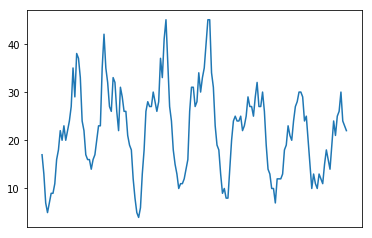

In [15]:
plt.xticks(df2['Online (h)'], df2.index)
plt.plot( df2['Online (h)'])
plt.show()

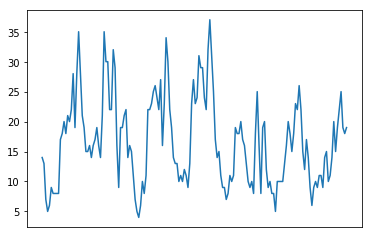

In [21]:
#plot number of hours driver was waiting for booking ---> probably hours of over supply 
plt.xticks(df2['Waiting for booking (h)'], df2.index)
plt.plot( df2['Waiting for booking (h)'])
plt.show()

In [ ]:
#plot number of hours driver was waiting for booking ---> probably hours of over supply 

plt.xticks(df1['Waiting for booking (h)'], df1.index)
plt.plot( df2['Waiting for booking (h)'])
plt.show()

In [17]:
#total number of unique searches with 100% coverage 
df1['Taxify: Coverage Ratio (unique)']

Date
2016-11-13 23:00:00     94
2016-11-13 22:00:00     87
2016-11-13 21:00:00     76
2016-11-13 20:00:00     89
2016-11-13 19:00:00     84
2016-11-13 18:00:00     85
2016-11-13 17:00:00     68
2016-11-13 16:00:00     81
2016-11-13 15:00:00     82
2016-11-13 14:00:00     69
2016-11-13 13:00:00     70
2016-11-13 12:00:00     71
2016-11-13 11:00:00     85
2016-11-13 10:00:00     54
2016-11-13 09:00:00     59
2016-11-13 08:00:00     79
2016-11-13 07:00:00     71
2016-11-13 06:00:00     80
2016-11-13 05:00:00     85
2016-11-13 04:00:00     45
2016-11-13 03:00:00     67
2016-11-13 02:00:00     79
2016-11-13 01:00:00     84
2016-11-13 00:00:00     79
2016-11-12 23:00:00     74
2016-11-12 22:00:00     81
2016-11-12 21:00:00     91
2016-11-12 20:00:00     79
2016-11-12 19:00:00     77
2016-11-12 18:00:00     80
                      ... 
2016-11-08 05:00:00    100
2016-11-08 04:00:00     57
2016-11-08 03:00:00     44
2016-11-08 02:00:00     56
2016-11-08 01:00:00     83
2016-11-08 00:00:00    

In [18]:
#coverage search greater than 100
coverage = df1['Taxify: Coverage Ratio (unique)'] > 99

In [19]:
coverage.sum()

3

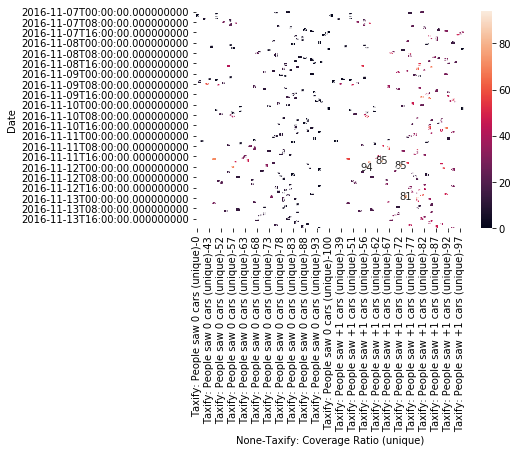

In [20]:
df1 = df1.pivot(df1.index,"Taxify: Coverage Ratio (unique)")
ax = sns.heatmap(df1, annot=True)


In [ ]:
#